In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
### Load Graphs
data_base_path = "Data/"

# G_actor = nx.read_gml(data_base_path + "graph_actors.gml")
G_amazon = nx.read_gml(data_base_path + "graph_amazon.gml")
G_escort = nx.read_gml(data_base_path + "graph_escort.gml")
G_internet = nx.read_gml(data_base_path + "graph_internet.gml")

### A05.01

In [4]:
import powerlaw
from scipy.stats import poisson, expon

figure_index = 100
def new_figure():
    global figure_index
    plt.figure(figure_index)
    figure_index = figure_index + 1

def superimpose_degree_distribution(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]
    powerlaw.plot_pdf(degree_array, color='b', label="True degree distrubution",linestyle="--")


def superimpose_powerlaw(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]
    pl = powerlaw.Fit(degree_array)
    alpha = pl.power_law.alpha
    print("alpha:  "+str(alpha))
    print("error: " + str(pl.power_law.sigma))

    pl.power_law.plot_pdf(color='b', label="Theoretical power law")

    spacing = np.linspace(min(degree_array),max(degree_array),len(degree_array))
    degree_x_na_alpha = spacing**(-1*alpha)

    plt.xlabel("degree")
    plt.ylabel("possibility")
    plt.plot(spacing, degree_x_na_alpha, label = "power law fitting the data", color="r")

def poisson_p(k, lamda):
    # return decimal.Decimal(decimal.Decimal(lamda**k) / decimal.Decimal(factorial(k, exact=True)) * decimal.Decimal(np.exp(decimal.Decimal(-1*lamda))))
    return poisson.pmf(k, lamda)
def exponential_p(k, lamda):
    # return lamda**(-1)*np.exp(-k/lamda)
    return expon.pdf(k,scale = lamda )

def superimpose_exponential(G:nx.Graph, lamda):
    degrees = G.degree()
    degree_array = [degrees[i] for i in G.nodes()]
    degree_set = set(degree_array)
    degree_set = np.sort(list(degree_set))
    x_y =[(d, exponential_p(d, lamda)) for d in degree_set]
    x_y = np.asarray(x_y)
    x = x_y[:,0]
    y = x_y[:,1]
    plt.xlabel("degree")
    plt.ylabel("possibility")
    plt.plot(x, y, label="exponential p", color="orange")

def superimpose_poisson(G:nx.Graph, lamda):
    degrees = G.degree()
    degree_array = [degrees[i] for i in G.nodes()]
    degree_set = set(degree_array)
    degree_set = np.sort(list(degree_set))
    x_y =[(d, poisson_p(d, lamda)) for d in degree_set]
    x_y = np.asarray(x_y)
    x = x_y[:,0]
    y = x_y[:,1]
    plt.xlabel("degree")
    plt.ylabel("possibility")
    plt.plot(x, y, label="poisson p", color="g")

def plot_distribution(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]
    avg_k = np.mean(degree_array)

    new_figure()
    plt.xlabel("degree")
    plt.ylabel("possibility")
    superimpose_degree_distribution(G)
    superimpose_exponential(G, avg_k)
    superimpose_powerlaw(G)
    superimpose_poisson(G, avg_k)

    plt.legend(bbox_to_anchor=(1.6, 0.5))

#### Amazon

Calculating best minimal value for power law fit
alpha:  4.065660034466614
error: 0.09699319113242895


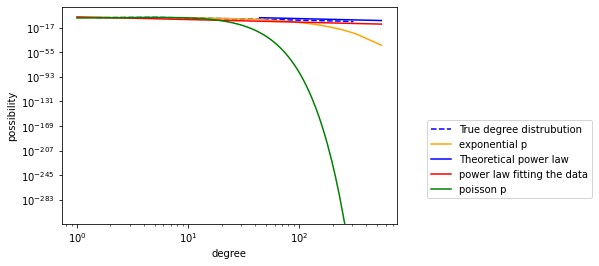

In [5]:
plot_distribution(G_amazon)

#### escort

Calculating best minimal value for power law fit
alpha:  2.9544249080995764
error: 0.07919729392592209


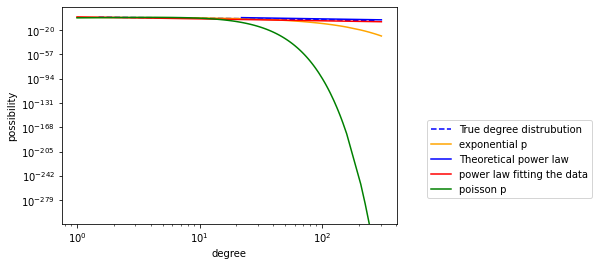

In [6]:
plot_distribution(G_escort)

#### internet

Calculating best minimal value for power law fit
alpha:  2.112191339113011
error: 0.0366878070312722


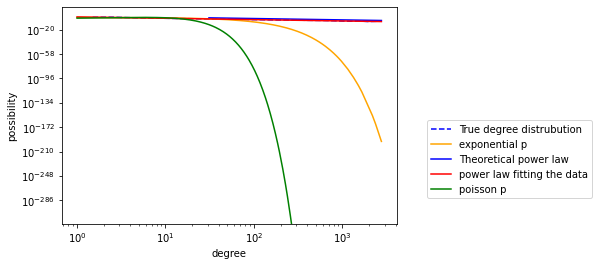

In [7]:
plot_distribution(G_internet)

#### A05.01 - 3
The network of AS is scale-free.
The maximum connenctions that the hubs have grows with the network size, which means, as more nodes of the lower layers of the routing network join, the layer-1 AS can also have more connecntions.
And this AS network have several layers. When new nodes join, the upper layers would also grow and have more connections.

Below is the graph for only power-law and true degree distribution.

Calculating best minimal value for power law fit
alpha:  2.112191339113011
error: 0.0366878070312722


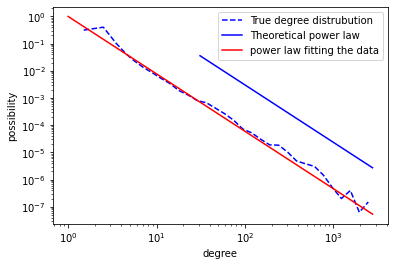

In [8]:
new_figure()
plt.xlabel("degree")
plt.ylabel("possibility")
superimpose_degree_distribution(G_internet)
superimpose_powerlaw(G_internet)
plt.legend()

### A05.02

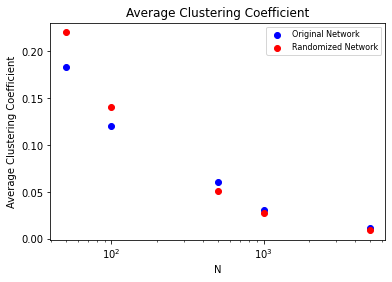

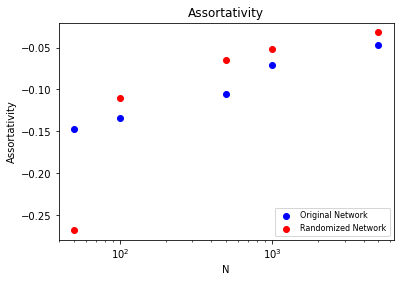

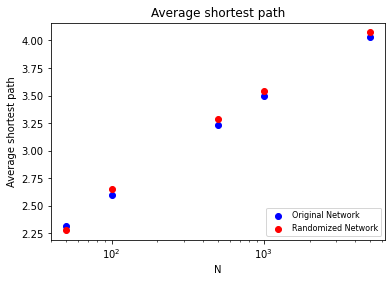

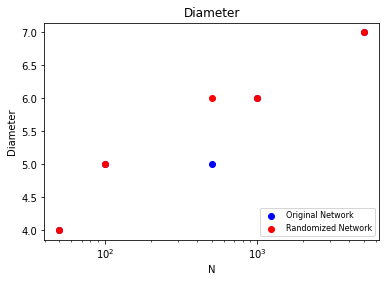

In [13]:
#task 2 

m = 3
N = [50, 100, 500, 1000, 5000]
list_avg_cluster_coefficient = []
list_rnd_avg_cluster_coefficient = []
list_assortativity = []
list_rnd_assortativity = []
list_avg_shortest_path = []
list_rnd_avg_shortest_path = []
list_diameter = []
list_rnd_diameter = []

for i in range(0, len(N)):
    G = nx.barabasi_albert_graph(N[i], m)
    G_rnd = nx.algorithms.smallworld.random_reference(G)

    avg_cluster_coefficient = nx.average_clustering(G)
    avg_cluster_coefficient_rnd = nx.average_clustering(G_rnd)
    list_avg_cluster_coefficient.append(avg_cluster_coefficient)
    list_rnd_avg_cluster_coefficient.append(avg_cluster_coefficient_rnd)
    print("Average assortativity coefficient for N =", N[i] ,"is: " + str(round(avg_cluster_coefficient, 4)))
    print("Average assortativity coefficient for randomized network of N =", N[i] ,"is: "+ str(round(avg_cluster_coefficient_rnd, 4)))

    assortativity = nx.degree_assortativity_coefficient(G)
    assortativity_rnd = nx.degree_assortativity_coefficient(G_rnd)
    list_assortativity.append(assortativity)
    list_rnd_assortativity.append(assortativity_rnd)
    print("Assortativity for N =", N[i] ,"is: " + str(round(assortativity, 4)))
    print("Assortativity for randomized network of N =", N[i] ,"is: "+ str(round(assortativity_rnd, 4)))

    avg_shortest_path = nx.average_shortest_path_length(G)
    avg_shortest_path_rnd = nx.average_shortest_path_length(G_rnd)
    list_avg_shortest_path.append(avg_shortest_path)
    list_rnd_avg_shortest_path.append(avg_shortest_path_rnd)
    print("Average shortest path for N =", N[i] ,"is: " + str(round(avg_shortest_path, 4)))
    print("Average shortest path for randomized network of N =", N[i] ,"is: "+ str(round(avg_shortest_path_rnd, 4)))

    diameter = nx.diameter(G)
    diameter_rnd = nx.diameter(G_rnd)
    list_diameter.append(diameter)
    list_rnd_diameter.append(diameter_rnd)
    print("Diameter for N =", N[i] ,"is: " + str(diameter))
    print("Diameter for randomized network of N =", N[i] ,"is: "+ str(diameter_rnd))
    print("\n")

# list_assortativity=[-0.1475371977681335, -0.13391683132963267, -0.10560955355850746, -0.0708456184024842, -0.04715544786057382]
# list_avg_cluster_coefficient=[0.18314137170019523, 0.12052642648627299, 0.06021638447743119, 0.030498303017622495, 0.011530301633400825]
# list_avg_shortest_path=[2.32, 2.597777777777778, 3.228689378757515, 3.4946806806806805, 4.029317303460692]
# list_diameter=[4, 5, 5, 6, 7]
# list_rnd_assortativity = [-0.2681695598264104, -0.10992911651382563, -0.06441831437660461, -0.051365052139487735, -0.03179441629786604]
# list_rnd_avg_cluster_coefficient=[0.21986894151600034, 0.1404185228241494, 0.05089284680922879, 0.02749874710932103, 0.00926529136955153]
# list_rnd_avg_shortest_path = [2.2791836734693875, 2.6533333333333333, 3.289002004008016, 3.545101101101101, 4.071882536507301]
# list_rnd_diameter = [4, 5, 6, 6, 7]

plt.figure(1)
plt.title("Average Clustering Coefficient")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
original = plt.scatter(N, list_avg_cluster_coefficient, color = 'blue')
rnd = plt.scatter(N, list_rnd_avg_cluster_coefficient, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='upper right',
           ncol=1,
           fontsize=8)

plt.figure(2)
plt.title("Assortativity")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Assortativity")
plt.scatter(N, list_assortativity, color = 'blue')
plt.scatter(N, list_rnd_assortativity, color = 'red')
plt.legend((original, rnd),
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(3)
plt.title("Average shortest path")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average shortest path")
plt.scatter(N, list_avg_shortest_path, color = 'blue')
plt.scatter(N, list_rnd_avg_shortest_path, color = 'red')
plt.legend((original, rnd),
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(4)
plt.title("Diameter")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Diameter")
plt.scatter(N, list_diameter, color = 'blue')
plt.scatter(N, list_rnd_diameter, color = 'red')
plt.legend((original, rnd),
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)


## A05.03
The average shortest path length almost doesn't change.
And most of the diameters and average clusting coefficient doesn't change a lot.

So first, the average shortest path.
Since the original networks are generated by GA model, which means the networks follow power law and have preference attachment property.
Thus, a large proportion of nodes are attached to hubs. And low-degree nodes may not have too many interactions. So most of shortest paths are through the hubs.
After randomised, it is highly possible that the networks' nodes are still connected to the same hubs. That is the reason why the average shortest path lengths only change slightly.

Second, the Diameter.
It has a similar reason to above. After randomized, the structure of the networks may not change a lot.

Third, average clusting coefficient. It slightly changes at beginning. And when N grows, it almost doesn't change.
Like above reason, when the scale of network grows, the low-degree nodes would been much more. So the possibility of switching nodes' edge, which connects to the same hubs and are in the same giant component, grows much higher. So the clustering coefficient finally almost doesn't change.





